# <span style='color:dodgerblue; font-weight:bold;'> House Prices </span>

Kaggle | House Prices - Advanced Regression Techniques

Ask a home buyer to describe their dream house, and they probably won’t begin with the height of the basement ceiling or the proximity to an east-west railroad. But this playground competition’s dataset proves that much more influences price negotiations than the number of bedrooms or a white-picket fence.

With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this competition challenges you to predict the final price of each home.

### <span style='color:aqua; font-weight:bold;'> Import Packages and Load the data</span> 

In [39]:
# Essential
import numpy as np
import pandas as pd

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.style as style
import plotly.graph_objects as go
import plotly.express as px
%matplotlib inline

# Machine learning and statistical
import statsmodels.api as sm
from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor

# Ignore useless warnings
import warnings
warnings.filterwarnings('ignore')

In [40]:
train = pd.read_csv("train.csv") # read training data.

# <span style='color:dodgerblue; font-weight:bold;'> Exploratory Data Analysis</span> 

In [41]:
train.shape # shape of training.

(1460, 81)

In [42]:
train.head(10) # head of training.

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [43]:
train.describe().T # Description of the dataset

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


In [44]:
train.info() # information about the training data.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [45]:
train.dtypes.value_counts() # data type count of the training dataset.

object     43
int64      35
float64     3
dtype: int64

In [46]:
# Sort the train data attributes to quantitative and qualitative categories.
quantitative_cols = []
qualitative_cols = []
for col in train.columns:
    if pd.api.types.is_numeric_dtype(train[col]):
            quantitative_cols.append(col)
    else:
        qualitative_cols.append(col)

print("Qualitative Columns: ") # Categorical
print(qualitative_cols)

print("Quantitative Columns: ") # Numarical
print(quantitative_cols)

Qualitative Columns: 
['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']
Quantitative Columns: 
['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars',

### <span style='color:aqua; font-weight:bold;'>Correlation</span> 

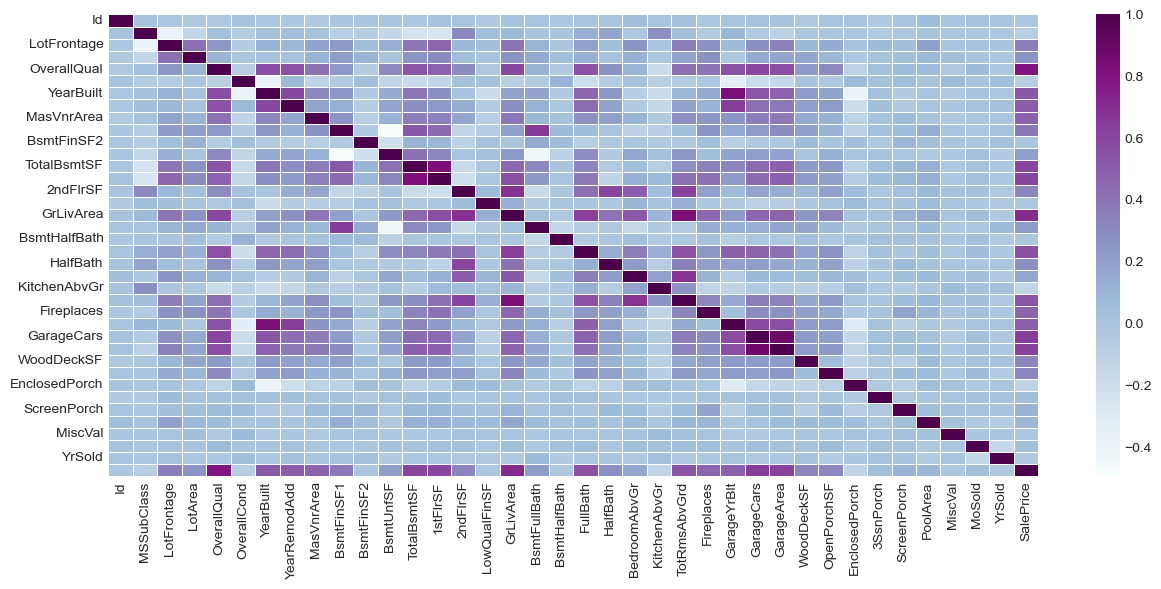

In [47]:
corr = train.corr()
plt.figure(figsize=(15,6)) #plot the heatmap for the correlation
sns.heatmap(corr,fmt=".5f", linewidth=.5, cmap="BuPu") 
plt.show() #the more darker color the more stronger correlation.

# <span style='color:dodgerblue; font-weight:bold;'>Data Cleaning</span> 

In [48]:
train.drop(['Id'], axis=1, inplace=True)

### <span style='color:aqua; font-weight:bold;'>Data Consistency</span> 

We need to ensure that the data values make sense by following these guidelines:

* Any features representing years should not exceed 2018.
* Areas, distances, and prices should be non-negative values.
* The values for months should fall within the range of 1 to 12.

In [49]:
years = ['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']
metrics = ['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
           'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'GarageArea',
           'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal']

In [50]:
mask = (train[years] > 2018).any(axis=1) # take any index with a twisted year value
train[mask]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


In [51]:
mask = (train[metrics] < 0).any(axis=1)
train[mask]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


In [52]:
mask = ((train['MoSold'] > 12) | (train['MoSold'] < 1))
train[mask]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


### <span style='color:aqua; font-weight:bold;'>Data Redundancy</span> 

In [53]:
# Check for duplicates across all columns
duplicated = train.duplicated()

# Print the number of duplicated instances
print("Number of duplicated instances:", duplicated.sum())

# Print the duplicated instances
print(train[duplicated])

Number of duplicated instances: 0
Empty DataFrame
Columns: [MSSubClass, MSZoning, LotFrontage, LotArea, Street, Alley, LotShape, LandContour, Utilities, LotConfig, LandSlope, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, OverallQual, OverallCond, YearBuilt, YearRemodAdd, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrType, MasVnrArea, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinSF1, BsmtFinType2, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, Heating, HeatingQC, CentralAir, Electrical, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, KitchenQual, TotRmsAbvGrd, Functional, Fireplaces, FireplaceQu, GarageType, GarageYrBlt, GarageFinish, GarageCars, GarageArea, GarageQual, GarageCond, PavedDrive, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, PoolQC, Fence, MiscFeature, MiscVal, MoSold, YrSold, SaleType, SaleCondition, SalePrice]
Index: [

### <span style='color:aqua; font-weight:bold;'>Missing Values</span> 

In [54]:
# print the percentage of missing values for instances.
total = train.isnull().sum().sort_values(ascending=False)[train.isnull().sum().sort_values(ascending=False) != 0]
percent = ((train.isnull().sum() / train.isnull().count()).sort_values(ascending=False)[(train.isnull().sum() / train.isnull().count()).sort_values(ascending=False) != 0]) * 100
missing = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing['Percent'] = missing['Percent'].apply(lambda x: "%.2f%%" % x)
print(missing)

              Total Percent
PoolQC         1453  99.52%
MiscFeature    1406  96.30%
Alley          1369  93.77%
Fence          1179  80.75%
FireplaceQu     690  47.26%
LotFrontage     259  17.74%
GarageYrBlt      81   5.55%
GarageCond       81   5.55%
GarageType       81   5.55%
GarageFinish     81   5.55%
GarageQual       81   5.55%
BsmtExposure     38   2.60%
BsmtFinType2     38   2.60%
BsmtCond         37   2.53%
BsmtQual         37   2.53%
BsmtFinType1     37   2.53%
MasVnrArea        8   0.55%
MasVnrType        8   0.55%
Electrical        1   0.07%


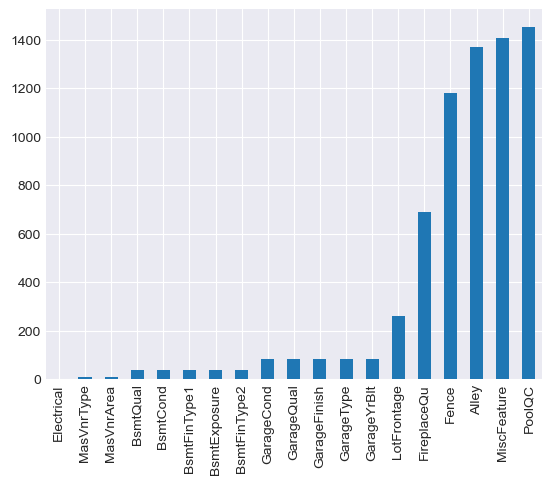

In [55]:
# Plot the most null columns.
missing = train.isnull().sum()
missing = missing[missing > 0]
style.use('seaborn-darkgrid')
missing.sort_values(inplace=True)
missing.plot.bar();

Missing values exist in 19 attributes, most of the time, NA denotes a lack of a subject described by an attribute, such as a missing pool, fence, garage, or basement.

Handling missing values for features that NA has a meaning.

In [56]:
columns_to_fill = ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu',
                   'GarageCond', 'GarageType', 'GarageFinish', 'GarageQual',
                   'BsmtExposure', 'BsmtFinType2', 'BsmtFinType1', 'BsmtCond',
                   'BsmtQual']

default_values = ['No Pool', 'None', 'No alley access', 'No Fence', 'No Fireplace',
                  'No Garage', 'No Garage', 'No Garage', 'No Garage', 'No Basement',
                  'No Basement', 'No Basement', 'No Basement', 'No Basement']

for column, default_value in zip(columns_to_fill, default_values):
    train[column] = train[column].fillna(default_value)

Handling missing values for features that NA doesn't have a meaning.

In [57]:
# Handling categorical missing values using SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imputer.fit(train[['MasVnrType', 'Electrical']])
train[['MasVnrType', 'Electrical']]=imputer.transform(train[['MasVnrType', 'Electrical']])

In [58]:
# Handling numarical missing values using SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(train[['LotFrontage', 'MasVnrArea', 'GarageYrBlt']])
train[['LotFrontage', 'MasVnrArea', 'GarageYrBlt']]=imputer.transform(train[['LotFrontage', 'MasVnrArea', 'GarageYrBlt']])

In [59]:
train.isnull().sum().sum() # Checking if there is any missing values

0

### <span style='color:aqua; font-weight:bold;'>One-hot Encoder</span> 

In [60]:
# Select the columns to encode
cols = ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
        'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
        'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
        'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
        'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
        'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional',
        'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive',
        'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']

# Encode the selected columns
dummies = pd.get_dummies(train[cols], drop_first=True)

# Concatenate the encoded columns with the original dataset
train = pd.concat([train, dummies], axis=1)

# Drop the original columns that have been encoded
train.drop(cols, axis=1, inplace=True)

# Output the modified dataset
train.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,0,0,0,1,0,0,0,1,0
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,0,0,0,0,1,0,0,0,1,0
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,0,0,0,1,0,0,0,1,0
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,0,0,0,1,0,0,0,0,0
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,0,0,0,0,1,0,0,0,1,0


# <span style='color:dodgerblue; font-weight:bold;'>Plot relationship between variables </span> 

In [61]:
def customized_scatterplot(y, x): # customized scatterplot design.
    style.use('seaborn-darkgrid')
    plt.subplots(figsize = (12, 8))
    sns.scatterplot(y = y, x = x)

The response variable: SalePrice

As you can see, the sale prices are right skewed. This was expected as few people can afford very expensive houses.

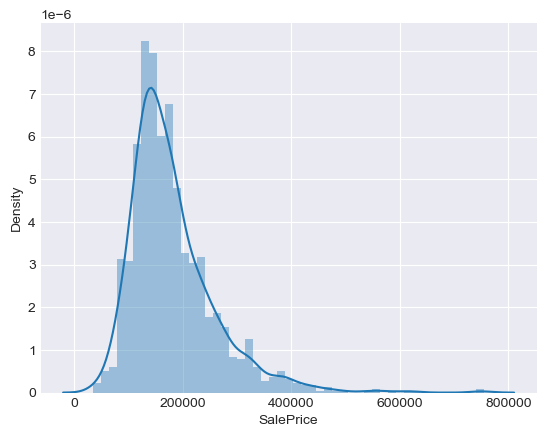

In [62]:
sns.distplot(train['SalePrice']);

SalePrice vs OverallQual

<AxesSubplot:xlabel='OverallQual', ylabel='SalePrice'>

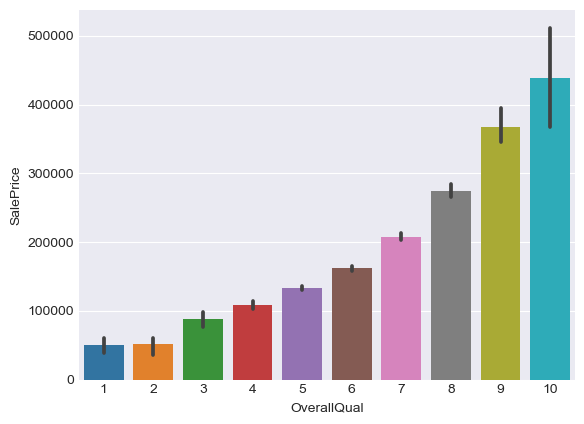

In [63]:
# Sale Price vs Rates the overall material and finish of the house
sns.barplot(x=train.OverallQual, y=train.SalePrice)

SalePrice vs OverallCond

<AxesSubplot:xlabel='OverallCond', ylabel='SalePrice'>

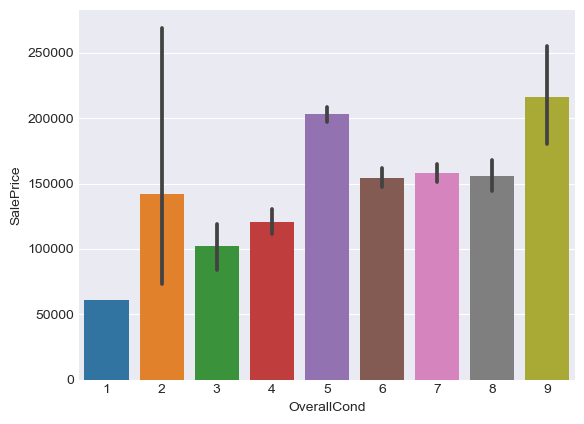

In [64]:
# Sale Price vs Rates the overall condition of the house.
sns.barplot(x=train.OverallCond, y=train.SalePrice)

SalePrice vs GrLivArea

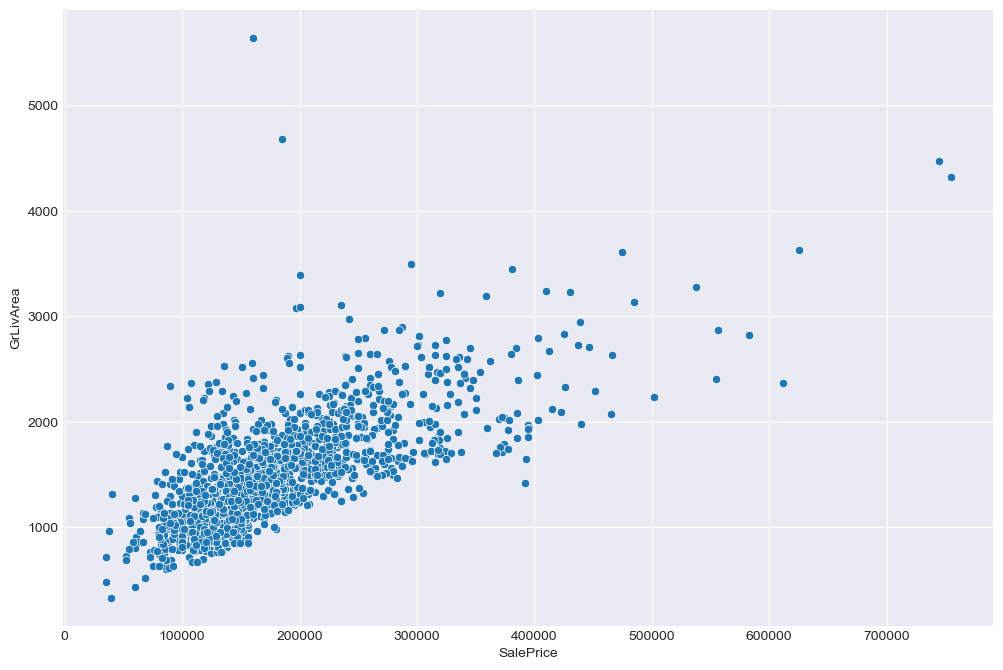

In [65]:
# Sale Price vs Above grade (ground) living area square feet.
customized_scatterplot(x=train.SalePrice, y=train.GrLivArea)

SalePrice vs GarageArea

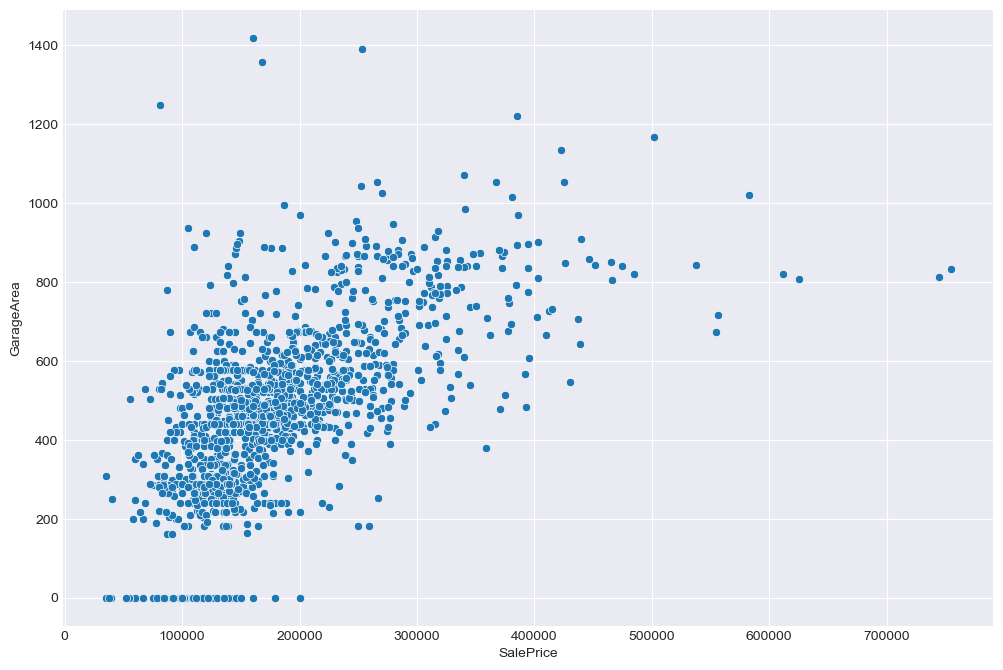

In [66]:
# Sale Price vs Size of garage in square feet.
customized_scatterplot(x=train.SalePrice, y=train.GarageArea)

SalePrice vs TotalBsmtSF

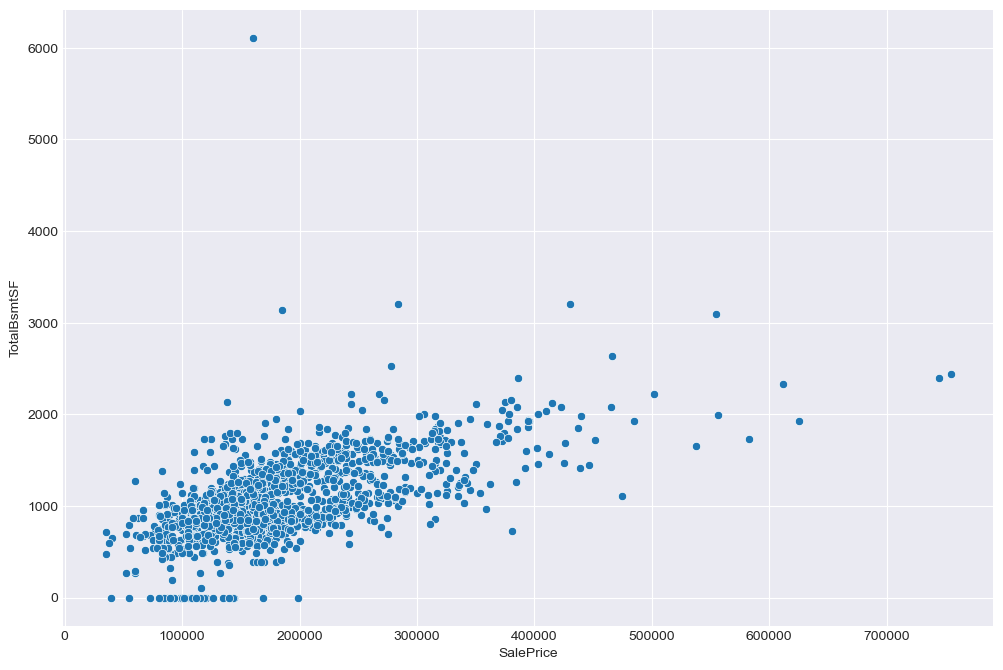

In [67]:
# Sale Price vs Total square feet of basement area.
customized_scatterplot(x=train.SalePrice, y=train.TotalBsmtSF)

SalePrice vs MasVnrArea

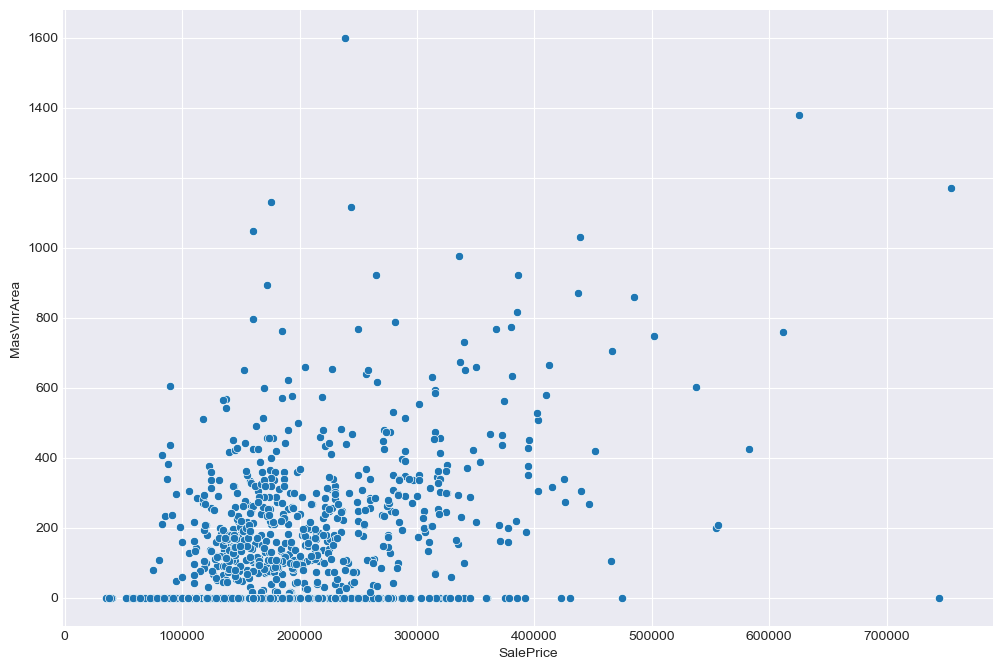

In [68]:
# Sale Price vs Masonry veneer area in square feet.
customized_scatterplot(x=train.SalePrice, y=train.MasVnrArea)

# <span style='color:dodgerblue; font-weight:bold;'>Machine Learning</span> 

### <span style='color:aqua; font-weight:bold;'>Pre-processing Steps for Machine Learning</span> 

In [69]:
# Extract the features (X) and target variable (y)
X = train.drop('SalePrice', axis=1)
y = train['SalePrice']

### <span style='color:aqua; font-weight:bold;'>Splitting the data</span> 

In [70]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### <span style='color:aqua; font-weight:bold;'>Normalization</span> 

In [71]:
# Standardize the features
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### <span style='color:aqua; font-weight:bold;'>Dimension Reduction</span> 

In [72]:
pca = PCA().fit(X_train)

fig = go.Figure()

xi = np.arange(1, 260, step=1)
y = np.cumsum(pca.explained_variance_ratio_)

fig.add_trace(go.Scatter(x=xi, y=y, mode='lines+markers', name='Explained Variance'))

# 95% Cut-off Threshold
fig.add_shape(type="line", x0=1, y0=0.95, x1=260, y1=0.95,
              line=dict(color='red', width=2, dash='dash'), name='95% Cut-off Threshold')

fig.update_layout(
    title='The Number of Components Needed to Explain Variance',
    xaxis_title='Number of Components',
    yaxis_title='Cumulative Variance (%)',
    xaxis=dict(tickmode='linear', tick0=0, dtick=20),
    yaxis=dict(range=[0, 1.1]),
    showlegend=True,
    legend=dict(x=0.5, y=0.85, bgcolor='rgba(0,0,0,0)'),
    hovermode='closest',
    plot_bgcolor='white'
)

fig.show()

In [73]:
pca = PCA(n_components = 150)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

### <span style='color:aqua; font-weight:bold;'>Model Selection</span> 

In [74]:
# Define the regression models
models = [
    LinearRegression(),
    DecisionTreeRegressor(),
    RandomForestRegressor(),
    SVR(),
    MLPRegressor(),
    XGBRegressor()
]

# Train and evaluate each model
for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    y_train_pred = model.fit(X_train, y_train)
    
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    
    print(type(model).__name__)
    print("R-squared:", round(r2, 4))
    print("Mean Absolute Error (MAE):", round(mae, 4))
    print("Mean Squared Error (MSE):", round(mse, 4))
    print("Root Mean Squared Error (RMSE):", round(rmse, 4))
    print("\n")

LinearRegression
R-squared: 0.8303
Mean Absolute Error (MAE): 22890.4974
Mean Squared Error (MSE): 1301400581.3554
Root Mean Squared Error (RMSE): 36074.9301


DecisionTreeRegressor
R-squared: 0.7358
Mean Absolute Error (MAE): 29642.0308
Mean Squared Error (MSE): 2026326107.3733
Root Mean Squared Error (RMSE): 45014.7321


RandomForestRegressor
R-squared: 0.8585
Mean Absolute Error (MAE): 20619.7638
Mean Squared Error (MSE): 1085503969.0322
Root Mean Squared Error (RMSE): 32946.9873


SVR
R-squared: -0.0245
Mean Absolute Error (MAE): 59538.5045
Mean Squared Error (MSE): 7857875493.6096
Root Mean Squared Error (RMSE): 88644.6586


MLPRegressor
R-squared: -4.0831
Mean Absolute Error (MAE): 177575.2252
Mean Squared Error (MSE): 38988802198.5752
Root Mean Squared Error (RMSE): 197455.8234


XGBRegressor
R-squared: 0.8681
Mean Absolute Error (MAE): 20738.6696
Mean Squared Error (MSE): 1011445768.3455
Root Mean Squared Error (RMSE): 31803.2352




### <span style='color:aqua; font-weight:bold;'>Model Performance</span> 

In [75]:
# Initialize lists to store the predictions
predictions = []

# Perform cross-validation and collect the predictions for each model
for model in models:
    y_pred = cross_val_predict(model, X_test, y_test, cv=5)
    predictions.append(y_pred)

# Plotting the model performance
fig = go.Figure()

for i, model in enumerate(models):
    # Add scatter plot for each model's predicted values
    fig.add_trace(go.Scatter(
        x=y_test,
        y=predictions[i],
        mode='markers',
        name=type(model).__name__,
        marker=dict(size=8, opacity=0.5)
    ))

# Add a best fit line for each model
fig.add_trace(go.Scatter(
    x=[y_test.min(), y_test.max()],
    y=[y_test.min(), y_test.max()],
    mode='lines',
    name='Best fit line',
    line=dict(color='red', dash='dash')
))

# Customize the layout
fig.update_layout(
    xaxis=dict(title='True Values'),
    yaxis=dict(title='Predicted Values'),
    title='Model Performance',
    hovermode='closest',
    showlegend=True
)

# Show the interactive plot
fig.show()

### <span style='color:aqua; font-weight:bold;'>Cross-Validation</span> 

In [76]:
# Iterate over each model in the models list and perform cross-validation
for model in models:
    model_name = type(model).__name__
    scores = cross_val_score(model, X_train, y_train, cv=10, scoring='r2')

    # Create a new figure for each model
    fig = go.Figure()

    # Add the cross-validation scores as a line plot to the figure
    fig.add_trace(go.Scatter(x=np.arange(1, 11), y=scores, mode='lines+markers', name=model_name))

    # Customize the layout of the figure for each model
    fig.update_layout(
        xaxis=dict(title='Fold'),
        yaxis=dict(title='CV Score (R-squared)'),
        height = 250,
        title=f'Cross-Validation Scores for {model_name}',
        hovermode='closest',
        plot_bgcolor='white'
    )

    # Show the interactive plot for each model
    fig.show()

# <span style='color:dodgerblue; font-weight:bold;'>Conclusion</span>

In this analysis, we explored a comprehensive dataset containing 79 explanatory variables describing residential homes in Ames, Iowa. Through various exploratory data analysis (EDA) techniques, we gained insights into the dataset and identified important features related to the sale price of houses.

During the EDA process, we examined the dataset's characteristics, such as the number of instances and features, data types, and descriptive statistics. By visualizing the correlations between variables using a heatmap, we discovered significant positive relationships between SalePrice and features like OverallQual, GrLivArea, and TotalBsmtSF.

Data cleaning was performed to handle missing values in the dataset. We identified the top three features with missing values as PoolQC, MiscFeature, and Alley. For features with missing values that could be replaced by a mean value, we imputed them accordingly. For other features, we used appropriate imputation techniques such as the most frequent value for categorical variables and the mean value for numerical variables. Data redundancy was not observed, indicating unique instances in the dataset.

To prepare the data for machine learning, we performed preprocessing steps. This involved extracting the features (X) and the target variable (y) from the dataset. We then normalized the features using StandardScaler and applied dimensionality reduction using PCA. The data was split into training and validation sets, with a test size of 20% and a training size of 80%.

Model selection was conducted using various regression models, including LinearRegression, DecisionTreeRegressor, RandomForestRegressor, SVR, MLPRegressor, and XGBRegressor. Evaluation metrics such as R-squared, Mean Absolute Error (MAE), and Root Mean Squared Error (RMSE) were used to assess the models' performance. Based on these metrics, the Random Forest Regressor and XGBoost Regressor showed relatively higher R-squared values, indicating better ability to explain the variance in the target variable. The Random Forest Regressor also exhibited lower MAE and RMSE values compared to the XGBoost Regressor. Therefore, the Random Forest Regressor may be considered the best model for this specific task. However, further analysis and validation using additional metrics and techniques are recommended to make a more comprehensive conclusion.

Additionally, cross-validation was performed to assess the models' generalization performance. The cross-validation scores for all models were plotted, providing an overview of their performance across different folds.

Overall, this analysis provides insights into the dataset, performs data cleaning and preprocessing, conducts model selection, and evaluates the models using various metrics. By combining these steps, we can make informed decisions and develop robust models for predicting house prices.